In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Dhaka_house_info.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,"Block H, Bashundhara R-A, Dhaka",2 BHK,NaN,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,"Farmgate, Tejgaon, Dhaka",4 Bedroom,NaN,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,"Block B, Nobodoy Housing Society, Mohammadpur,...",3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,"Gulshan 1, Gulshan, Dhaka",3 BHK,NaN,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,"Baridhara, Dhaka",2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [8]:
df2.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2.shape

(13320, 5)

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13247, 5)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\Dihan\AppData\Local\Temp\ipykernel_2468\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,"Baridhara, Dhaka",4 BHK,2100 - 2850,4.0,186.000,4
122,"Gulshan 1, Gulshan, Dhaka",4 BHK,3067 - 8156,4.0,477.000,4
137,"Block F, aziz Moholla, Mohammadpur, Dhaka",2 BHK,1042 - 1105,2.0,54.005,2
165,"Nikunja 2, Nikunja, Dhaka",2 BHK,1145 - 1340,2.0,43.490,2
188,"Block D, Bashundhara R-A, Dhaka",2 BHK,1015 - 1540,2.0,56.800,2
410,"Banasree, Dhaka",1 BHK,34.46Sq. Meter,1.0,18.500,1
549,"Block F, Section 11, Mirpur, Dhaka",2 BHK,1195 - 1440,2.0,63.770,2
648,"Block A, Mohanagar Housing, West Rampura, Ramp...",9 Bedroom,4125Perch,9.0,265.000,9
661,"Banani, Dhaka",2 BHK,1120 - 1145,2.0,48.130,2
672,"Pirerbag, Mirpur, Dhaka",4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [16]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,"Block H, Bashundhara R-A, Dhaka",2 BHK,1056.0,2.0,39.07,2
1,"Farmgate, Tejgaon, Dhaka",4 Bedroom,2600.0,5.0,120.00,4


In [17]:
df4.loc[30]

location      Baridhara, Dhaka
size                     4 BHK
total_sqft              2475.0
bath                       4.0
price                    186.0
bhk                          4
Name: 30, dtype: object

In [18]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,"Block H, Bashundhara R-A, Dhaka",2 BHK,1056.0,2.0,39.07,2,3699.810606
1,"Farmgate, Tejgaon, Dhaka",4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",3 BHK,1440.0,2.0,62.00,3,4305.555556
3,"Gulshan 1, Gulshan, Dhaka",3 BHK,1521.0,3.0,95.00,3,6245.890861
4,"Baridhara, Dhaka",2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320100e+04
mean     7.920566e+03
std      1.067231e+05
min      2.678298e+02
25%      4.267782e+03
50%      5.438066e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [22]:
len(df5.location.unique())

623

In [23]:
df5.to_csv("bhp.csv",index=False)

In [24]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Mohammadpur, Dhaka                                   377
Mirpur, Dhaka                                        272
Dhanmondi, Dhaka                                     202
PC Culture Housing, Mohammadpur, Dhaka               176
Sector 10, Uttara, Dhaka                             159
                                                    ... 
Road No 16, Banani, Dhaka                              1
Jashimuddin Avenue, Dolipara, Uttara, Dhaka            1
Block Ka, Section 6, Mirpur, Dhaka                     1
Nobinbagh, West Meradia, Meradia, Khilgaon, Dhaka      1
Doddathoguru                                           1
Name: location, Length: 623, dtype: int64

In [25]:
location_stats.values.sum()

13201

In [26]:
len(location_stats[location_stats>10])

282

In [27]:
len(location_stats)

623

In [28]:
len(location_stats[location_stats<=10])

341

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

East Hazipara, East Rampura, Rampura, Dhaka          10
Jahuri Moholla, Mohammadpur, Dhaka                   10
Kazirgaon, Jatra Bari, Dhaka                         10
Ullan, Rampura, Dhaka                                10
Block A, Section 1, Mirpur, Dhaka                    10
                                                     ..
Road No 16, Banani, Dhaka                             1
Jashimuddin Avenue, Dolipara, Uttara, Dhaka           1
Block Ka, Section 6, Mirpur, Dhaka                    1
Nobinbagh, West Meradia, Meradia, Khilgaon, Dhaka     1
Doddathoguru                                          1
Name: location, Length: 341, dtype: int64

In [30]:
len(df5.location.unique())

623

In [31]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

283

In [32]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,"Block H, Bashundhara R-A, Dhaka",2 BHK,1056.0,2.0,39.07,2,3699.810606
1,"Farmgate, Tejgaon, Dhaka",4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",3 BHK,1440.0,2.0,62.00,3,4305.555556
3,"Gulshan 1, Gulshan, Dhaka",3 BHK,1521.0,3.0,95.00,3,6245.890861
4,"Baridhara, Dhaka",2 BHK,1200.0,2.0,51.00,2,4250.000000
5,"Bashundhara R-A, Dhaka",2 BHK,1170.0,2.0,38.00,2,3247.863248
6,"Baridhara, Dhaka",4 BHK,2732.0,4.0,204.00,4,7467.057101
7,"PC Culture Housing, Mohammadpur, Dhaka",4 BHK,3300.0,4.0,600.00,4,18181.818182
8,"Jigatola, Hazaribag, Dhaka",3 BHK,1310.0,3.0,63.25,3,4828.244275
9,"West Kazipara, Mirpur, Dhaka",6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [33]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,"West Kazipara, Mirpur, Dhaka",6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,"Block D, Bashundhara R-A, Dhaka",8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,"Block J, Bashundhara R-A, Dhaka",6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,"Maghbazar, Dhaka",8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,"West Kalachandpur, Kalachandpur, Dhaka",3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [34]:
df5.shape

(13201, 7)

In [35]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12457, 7)

In [36]:
df6.price_per_sqft.describe()

count     12457.000000
mean       6308.427888
std        4167.968413
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10545, 7)

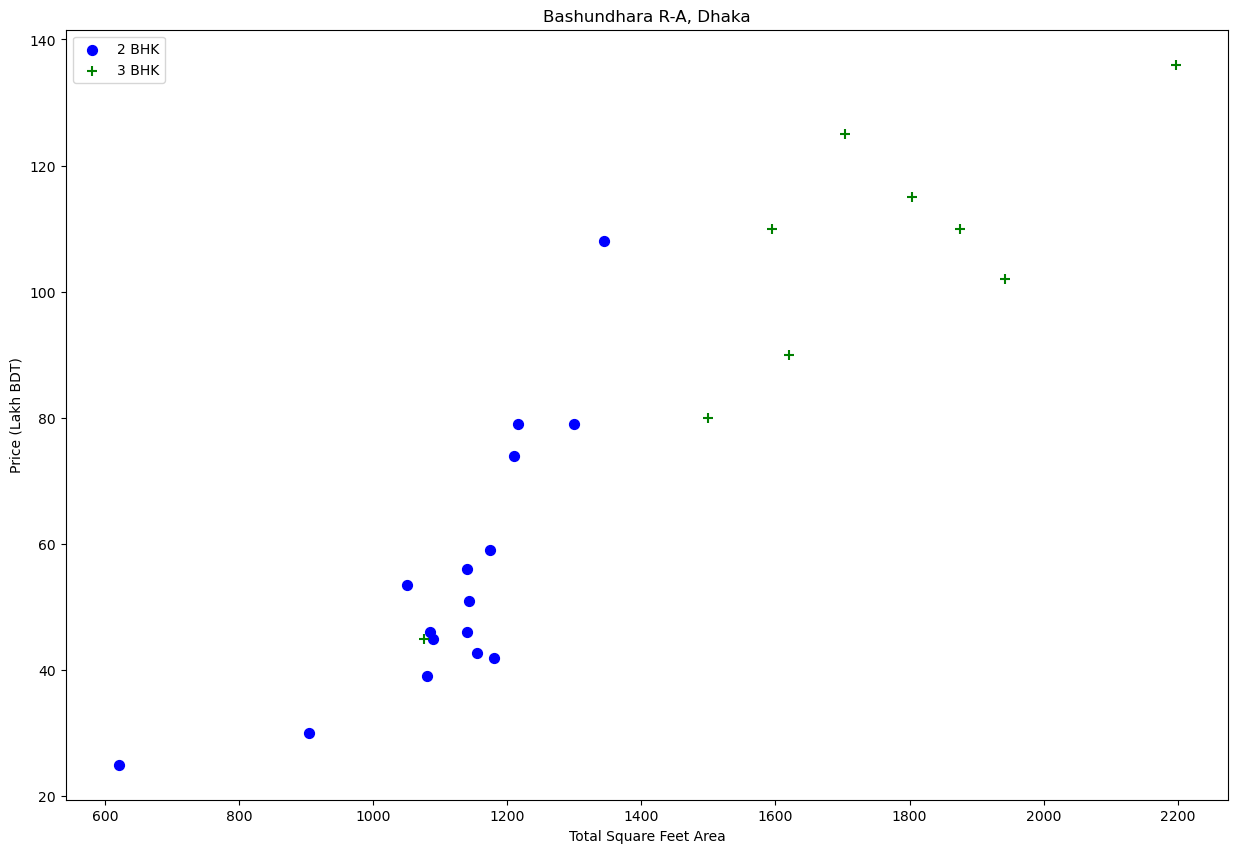

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh BDT)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Bashundhara R-A, Dhaka")

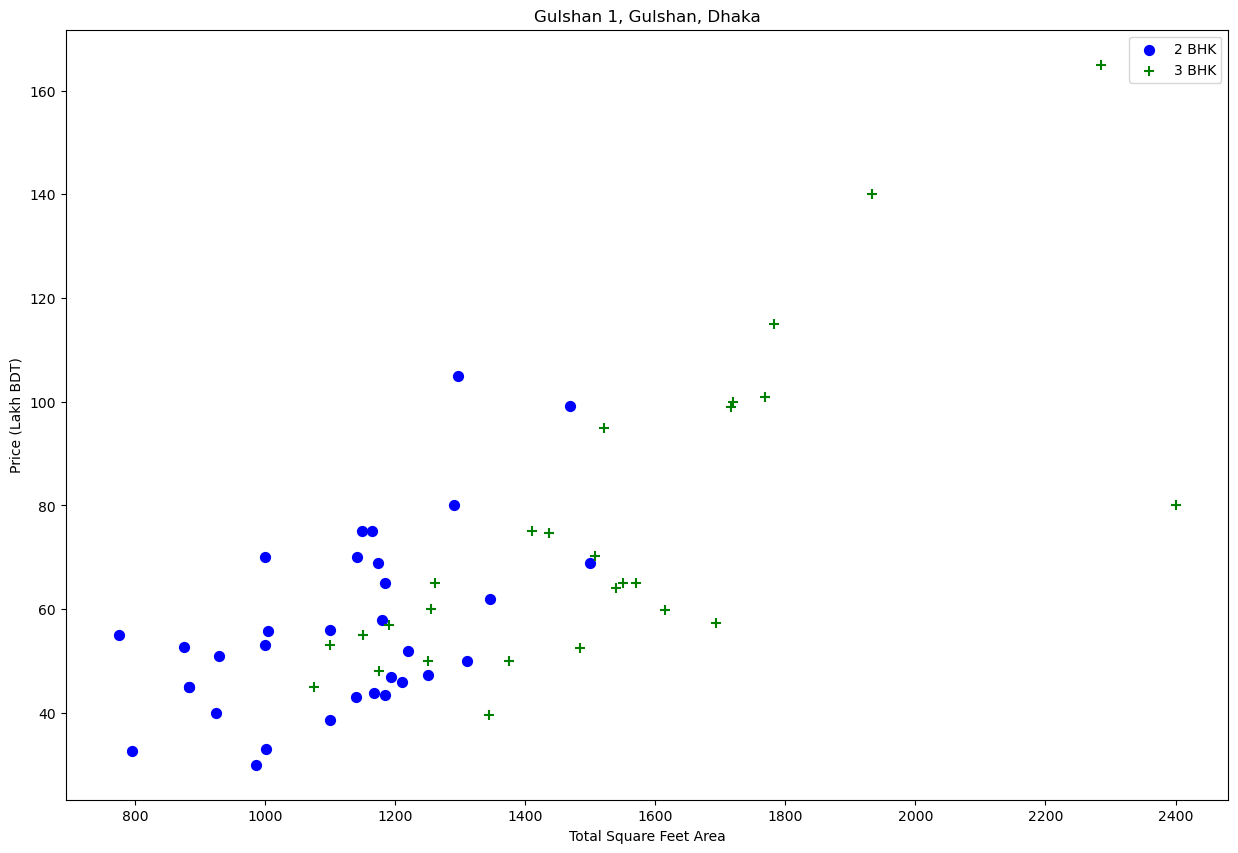

In [41]:
plot_scatter_chart(df7,"Gulshan 1, Gulshan, Dhaka")

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7844, 7)

Text(0, 0.5, 'Count')

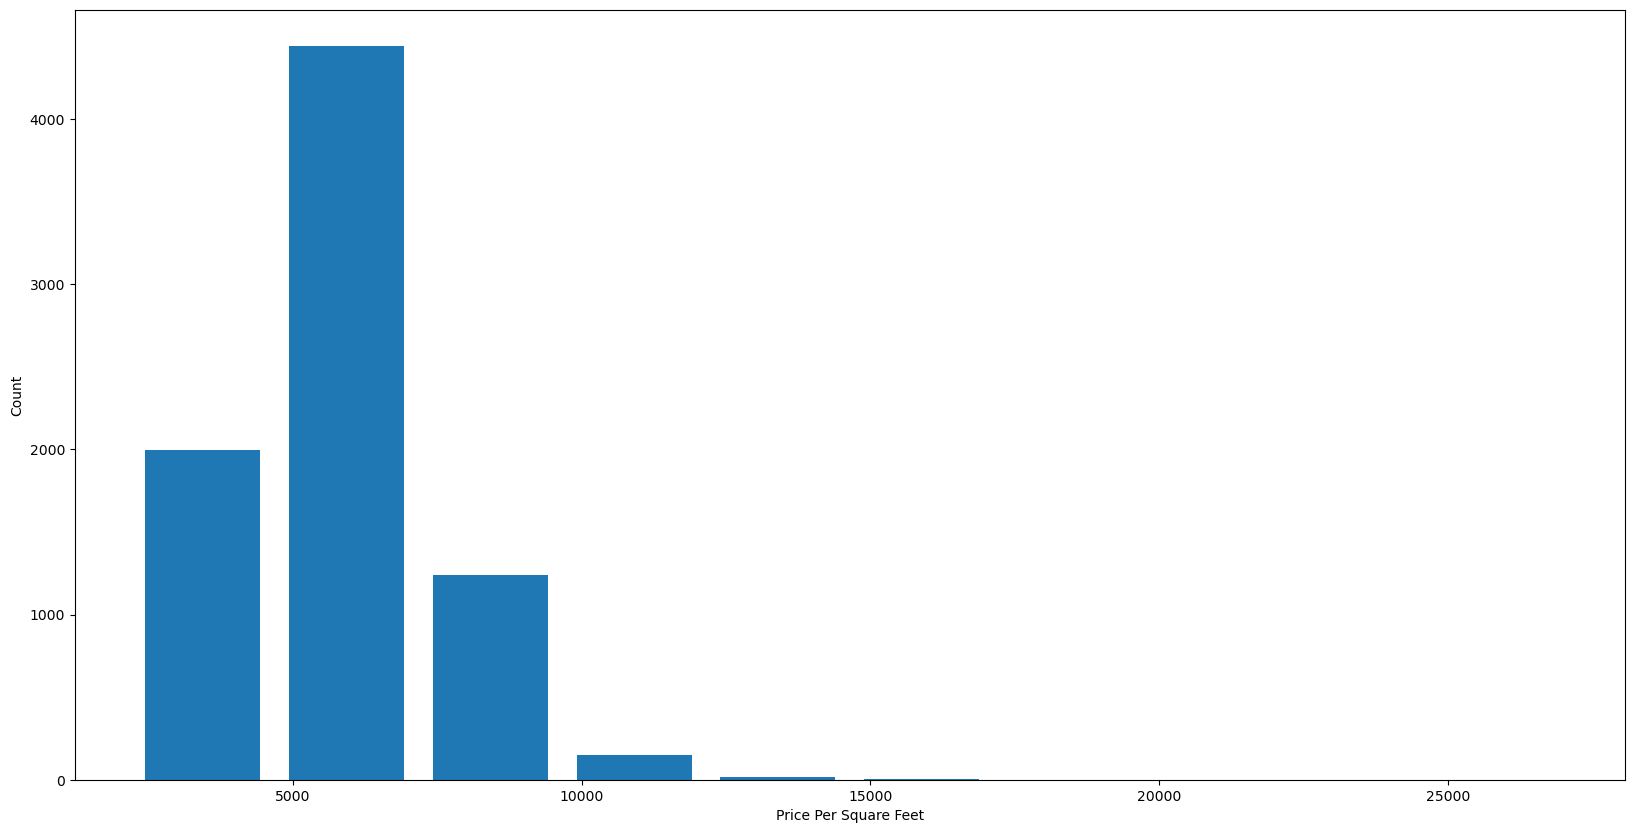

In [44]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [45]:
df8.bath.unique()

array([ 2.,  3.,  4.,  6.,  1.,  5.,  7.,  8., 12.,  9., 10., 13., 16.])

Text(0, 0.5, 'Count')

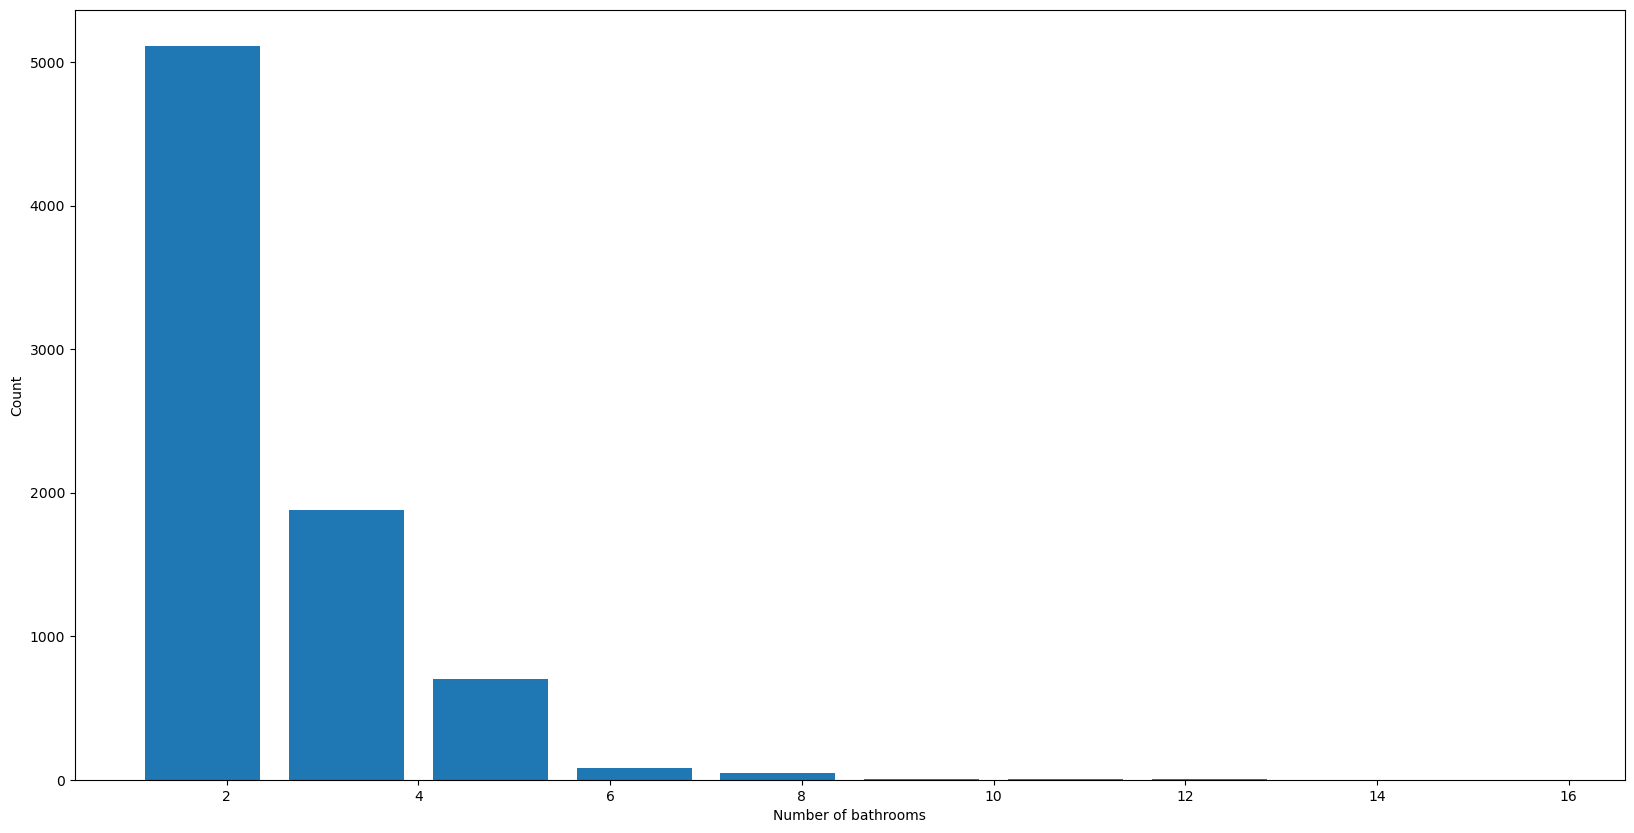

In [46]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [47]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
999,"Block A, Dhaka Uddan, Mohammadpur, Dhaka",10 BHK,4000.0,12.0,160.0,10,4000.000000
2158,"Block D, Section 10, Mirpur, Dhaka",11 BHK,6000.0,12.0,150.0,11,2500.000000
3025,"Block L, Bashundhara R-A, Dhaka",10 BHK,12000.0,12.0,525.0,10,4375.000000
4608,"Kallyanpur, Mirpur, Dhaka",13 BHK,5425.0,13.0,275.0,13,5069.124424
8989,"Uttar Badda, Badda, Dhaka",16 BHK,10000.0,16.0,550.0,16,5500.000000


In [48]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7096,"Section 1, Mirpur, Dhaka",3 BHK,1806.0,6.0,116.0,3,6423.034330
8421,"Shegunbagicha, Dhaka",4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [49]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7772, 7)

In [50]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,"1st Colony, Mirpur, Dhaka",2 BHK,1295.0,2.0,65.0,2,5019.305019
1,"1st Colony, Mirpur, Dhaka",3 BHK,1655.0,3.0,115.0,3,6948.640483


In [51]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,"1st Colony, Mirpur, Dhaka",1295.0,2.0,65.00,2
1,"1st Colony, Mirpur, Dhaka",1655.0,3.0,115.00,3
2,"1st Colony, Mirpur, Dhaka",1100.0,2.0,38.45,2


In [52]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,"1st Colony, Mirpur, Dhaka","2nd Colony, Mirpur, Dhaka","3rd Colony, Mirpur, Dhaka","Aainusbag, Dakshin Khan, Dhaka","Abdur Rafique Housing Society, Shekhertek, Mohammadpur, Dhaka","Adabor, Dhaka","Adarsha Para, Uttar Khan, Dhaka","Agargaon, Dhaka","Ali And Nur Real Estate, Mohammadpur, Dhaka","Arambagh, Motijheel, Dhaka",...,"West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Kafrul, Taltola, Agargaon, Dhaka","West Kalachandpur, Kalachandpur, Dhaka","West Kazipara, Mirpur, Dhaka","West Nakhalpara, Tejgaon, Dhaka","West Rampura, Rampura, Dhaka","West Shewrapara, Mirpur, Dhaka","aziz Moholla, Mohammadpur, Dhaka",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,"1st Colony, Mirpur, Dhaka","2nd Colony, Mirpur, Dhaka","3rd Colony, Mirpur, Dhaka","Aainusbag, Dakshin Khan, Dhaka","Abdur Rafique Housing Society, Shekhertek, Mohammadpur, Dhaka",...,"Wari, Sutrapur, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Kafrul, Taltola, Agargaon, Dhaka","West Kalachandpur, Kalachandpur, Dhaka","West Kazipara, Mirpur, Dhaka","West Nakhalpara, Tejgaon, Dhaka","West Rampura, Rampura, Dhaka","West Shewrapara, Mirpur, Dhaka","aziz Moholla, Mohammadpur, Dhaka"
0,"1st Colony, Mirpur, Dhaka",1295.0,2.0,65.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"1st Colony, Mirpur, Dhaka",1655.0,3.0,115.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"1st Colony, Mirpur, Dhaka",1100.0,2.0,38.45,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"1st Colony, Mirpur, Dhaka",2257.0,4.0,157.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"1st Colony, Mirpur, Dhaka",1900.0,3.0,123.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,"1st Colony, Mirpur, Dhaka","2nd Colony, Mirpur, Dhaka","3rd Colony, Mirpur, Dhaka","Aainusbag, Dakshin Khan, Dhaka","Abdur Rafique Housing Society, Shekhertek, Mohammadpur, Dhaka","Adabor, Dhaka",...,"Wari, Sutrapur, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Kafrul, Taltola, Agargaon, Dhaka","West Kalachandpur, Kalachandpur, Dhaka","West Kazipara, Mirpur, Dhaka","West Nakhalpara, Tejgaon, Dhaka","West Rampura, Rampura, Dhaka","West Shewrapara, Mirpur, Dhaka","aziz Moholla, Mohammadpur, Dhaka"
0,1295.0,2.0,65.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1655.0,3.0,115.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12.shape

(7772, 286)

In [58]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,"1st Colony, Mirpur, Dhaka","2nd Colony, Mirpur, Dhaka","3rd Colony, Mirpur, Dhaka","Aainusbag, Dakshin Khan, Dhaka","Abdur Rafique Housing Society, Shekhertek, Mohammadpur, Dhaka","Adabor, Dhaka","Adarsha Para, Uttar Khan, Dhaka",...,"Wari, Sutrapur, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Kafrul, Taltola, Agargaon, Dhaka","West Kalachandpur, Kalachandpur, Dhaka","West Kazipara, Mirpur, Dhaka","West Nakhalpara, Tejgaon, Dhaka","West Rampura, Rampura, Dhaka","West Shewrapara, Mirpur, Dhaka","aziz Moholla, Mohammadpur, Dhaka"
0,1295.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1655.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2257.0,4.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1900.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = df12.price
y.head(3)

0     65.00
1    115.00
2     38.45
Name: price, dtype: float64

In [61]:
len(y)

7772

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8096570924175208

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78529764, 0.88452754, 0.88803618, 0.82623244, 0.81373066])

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Dihan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Dihan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.839565,{'normalize': False}
1,lasso,0.843602,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.754870,"{'criterion': 'mse', 'splitter': 'random'}"


In [70]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Colony, Mirpur, Dhaka',
       '2nd Colony, Mirpur, Dhaka', '3rd Colony, Mirpur, Dhaka',
       'Aainusbag, Dakshin Khan, Dhaka',
       'Abdur Rafique Housing Society, Shekhertek, Mohammadpur, Dhaka',
       'Adabor, Dhaka', 'Adarsha Para, Uttar Khan, Dhaka',
       ...
       'Wari, Sutrapur, Dhaka', 'West Agargaon, Agargaon, Dhaka',
       'West Dhanmondi and Shangkar, Dhanmondi, Dhaka',
       'West Kafrul, Taltola, Agargaon, Dhaka',
       'West Kalachandpur, Kalachandpur, Dhaka',
       'West Kazipara, Mirpur, Dhaka', 'West Nakhalpara, Tejgaon, Dhaka',
       'West Rampura, Rampura, Dhaka', 'West Shewrapara, Mirpur, Dhaka',
       'aziz Moholla, Mohammadpur, Dhaka'],
      dtype='object', length=285)

In [72]:
predict_price('2nd Colony, Mirpur, Dhaka',1000, 2, 2)

C:\Users\Dihan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.167083032445376

In [71]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [73]:
predict_price('Adarsha Para, Uttar Khan, Dhaka',1500, 2, 3)

C:\Users\Dihan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.25251347230297

In [74]:
import pickle
with open('dhaka_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [75]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))